**TC2034.300**

*Proyecto 2: aprendizaje no supervisado*

a00517244 Camila Navarro

A01197399 Diana Cadena

A01705747 Enrique García

## Contexto del dataset
El dataset que se está tomando en consideración para la realización de los proyectos de la materia tiene como nombre UCI ML Drug Review dataset. Como tal, se encuentran dos archivos csv, uno con datos para entrenamiento y otro para las pruebas. Este dataset es referente a la satisfacción de lxs pacientes en cuanto a medicamentos recetados, tomando en consideración el padecimiento presentado por lxs mismxs. Dentro de este dataset, se pueden hacer distintas correlaciones: padecimiento vs. medicamento y reseña vs. nivel de satisfacción

## Paso 1: Carga de datos y descripción básica
Importar datos

In [ ]:
#librerías básicas
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
import string 
import re 
#ml
from sklearn import preprocessing
from sklearn.cluster import KMeans
from sklearn.cluster import AgglomerativeClustering
from sklearn.model_selection import train_test_split

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
df = pd.concat(
    map(pd.read_csv, ['/content/drive/Shareddrives/Inteligencia Artificial/drugsComTest_raw.csv','/content/drive/Shareddrives/Inteligencia Artificial/drugsComTrain_raw.csv']), ignore_index=True)

In [ ]:
df.head()

,uniqueID,drugName,condition,review,rating,date,usefulCount
0,163740,Mirtazapine,Depression,"""I&#039;ve tried a few antidepressants over th...",10,28-Feb-12,22
1,206473,Mesalamine,"Crohn's Disease, Maintenance","""My son has Crohn&#039;s disease and has done ...",8,17-May-09,17
2,159672,Bactrim,Urinary Tract Infection,"""Quick reduction of symptoms""",9,29-Sep-17,3
3,39293,Contrave,Weight Loss,"""Contrave combines drugs that were used for al...",9,5-Mar-17,35
4,97768,Cyclafem 1 / 35,Birth Control,"""I have been on this birth control for one cyc...",9,22-Oct-15,4


In [ ]:
df.tail()

,uniqueID,drugName,condition,review,rating,date,usefulCount
215058,191035,Campral,Alcohol Dependence,"""I wrote my first report in Mid-October of 201...",10,31-May-15,125
215059,127085,Metoclopramide,Nausea/Vomiting,"""I was given this in IV before surgey. I immed...",1,1-Nov-11,34
215060,187382,Orencia,Rheumatoid Arthritis,"""Limited improvement after 4 months, developed...",2,15-Mar-14,35
215061,47128,Thyroid desiccated,Underactive Thyroid,"""I&#039;ve been on thyroid medication 49 years...",10,19-Sep-15,79
215062,215220,Lubiprostone,"Constipation, Chronic","""I&#039;ve had chronic constipation all my adu...",9,13-Dec-14,116


### Contenido de las clases relevantes

In [ ]:
df.isnull().sum()

uniqueID          0
drugName          0
condition      1194
review            0
rating            0
date              0
usefulCount       0
dtype: int64

## Paso 2: Limpieza


In [ ]:
data = df["review"]
data.head()

0    "I&#039;ve tried a few antidepressants over th...
1    "My son has Crohn&#039;s disease and has done ...
2                        "Quick reduction of symptoms"
3    "Contrave combines drugs that were used for al...
4    "I have been on this birth control for one cyc...
Name: review, dtype: object

### NLP

In [ ]:
from sklearn.feature_extraction.text import TfidfTransformer
from sklearn.feature_extraction.text import CountVectorizer
from gensim import summarization
from nltk.tokenize import word_tokenize
from sklearn.feature_extraction.text import TfidfVectorizer

In [ ]:
import nltk
nltk.download('stopwords')
nltk.download("popular")
import re
from nltk.corpus import stopwords
stop = stopwords.words("english")
from nltk.stem.porter import PorterStemmer
english_stemmer=nltk.stem.SnowballStemmer('english')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.
[nltk_data] Downloading collection 'popular'
[nltk_data]    | 
[nltk_data]    | Downloading package cmudict to /root/nltk_data...
[nltk_data]    |   Unzipping corpora/cmudict.zip.
[nltk_data]    | Downloading package gazetteers to /root/nltk_data...
[nltk_data]    |   Unzipping corpora/gazetteers.zip.
[nltk_data]    | Downloading package genesis to /root/nltk_data...
[nltk_data]    |   Unzipping corpora/genesis.zip.
[nltk_data]    | Downloading package gutenberg to /root/nltk_data...
[nltk_data]    |   Unzipping corpora/gutenberg.zip.
[nltk_data]    | Downloading package inaugural to /root/nltk_data...
[nltk_data]    |   Unzipping corpora/inaugural.zip.
[nltk_data]    | Downloading package movie_reviews to
[nltk_data]    |     /root/nltk_data...
[nltk_data]    |   Unzipping corpora/movie_reviews.zip.
[nltk_data]    | Downloading package names to /root/nltk_data...
[nltk_data] 

In [ ]:
stops = set(stopwords.words('english'))
print(stops)

{'should', 'having', 'each', 'are', 'or', 'whom', 'why', 'down', 'over', 's', 'during', 'didn', 'isn', 'itself', 'm', 'to', 'they', 'here', 'she', 'hadn', 'after', "mightn't", 'up', 'those', 'them', 'your', 'then', 'such', 'their', 'at', 'does', "aren't", 'it', "couldn't", 'myself', 'nor', 'a', 'its', 'too', 'my', 'couldn', 'aren', 'some', 'if', 've', 'own', 'about', 'just', 'ours', 'any', 'd', 'you', 'yours', "you'd", 'which', "you're", 'were', 'through', 'both', 'where', 'no', 'while', 'did', 'won', 'is', 'do', 'few', 'by', 'of', 'shan', 'when', 'because', "shan't", 'further', 'wouldn', "mustn't", 'was', 'herself', "hasn't", 'our', 'on', "you've", "shouldn't", 'until', 'haven', 'before', 'not', 'me', 'had', 'very', 'all', "she's", 'o', 'but', 'so', 're', 'mustn', 'being', "needn't", 'her', 'doing', 'as', 'how', 'other', 'ma', 'hers', 'once', 'for', 'doesn', 'wasn', 'between', 'mightn', 'more', 'only', 'needn', 'we', 'out', "isn't", 'than', 'has', "didn't", 'again', 'who', 'll', 'shou

In [ ]:
names = []
for name in df["drugName"]:
  names.append(name.lower())
names = set(names)
print(names)

{'np thyroid', 'corzide 80 / 5', 'vivactil', 'necon 1 / 50', 'paliperidone', 'altavera', 'rifampin', 'doryx', 'naloxone / pentazocine', 'fulvicin u / f', 'copegus', 'ropinirole', 'prezcobix', 'livalo', 'nalbuphine', 'corlanor', 'zonisamide', 'lamisil at', 'mg217 medicated tar', 'diprivan', 'rhinocort', 'ambien', 'orudis kt', 'aricept', 'mephyton', 'sensorcaine-mpf', 'afrin', 'erlotinib', 'amethyst', 'augmentin', 'dramamine ii', 'orapred', 'hydromet', 'advil cold and sinus', 'maxalt-mlt', 'methyltestosterone', 'estraderm', 'nostrilla', 'blisovi 24 fe', 'ryzolt', 'jalyn', 'forfivo xl', 'aloe vera', 'femcon fe', 'pancreatin', 'procentra', 'foradil aerolizer', 'klor-con', 'creon', 'acetic acid', 'qnasl', 'barium sulfate', 'opana', 'juleber', 'etonogestrel', 'cosamin ds', 'azelastine / fluticasone', 'lamictal', 'darifenacin', 'brompheniramine / codeine / phenylephrine', 'hydroxyzine', 'codeine / guaifenesin / pseudoephedrine', 'alendronate', 'nadolol', 'viberzi', 'stadol', 'jantoven', 'bydu

In [ ]:
import re
from nltk.stem import WordNetLemmatizer

def limpieza(text, remove_stopwords=False):
  text = text.lower()
  # Remover error de '
  text = re.sub("&#039;", "'", text)
  # Eliminar símbolos en ASCII (emojis, caracteres especiales, etc.)
  text_encode = text.encode(encoding="ascii", errors="ignore")
  text_decode = text_encode.decode()
  text = " ".join([word for word in text_decode.split()])
  # Remover URLs
  text = re.sub("https?:\/\/.*[\r\n]*", "", text)
  # Remover hashtags
  text = re.sub("#", "", text)
  # Remover puntuacion
  punct = set(string.punctuation) 
  text = "".join([ch for ch in text if ch not in punct])
  # Remover digitos
  digit = set(string.digits) 
  text = "".join([ch for ch in text if ch not in digit])
  # Remover nombres de medicinas
  text = "".join([drug for drug in text if drug not in names])

  if remove_stopwords:
    stops = set(stopwords.words("english"))
    text = "".join([word for word in text if word not in stops])
  b=[]
  lemmatizer = WordNetLemmatizer()
  text = text.split()
  for word in text:
    b.append(lemmatizer.lemmatize(word))
  
  return b

In [ ]:
review_limpio = []
for review in df['review']:
    review_limpio.append( " ".join(limpieza(review, remove_stopwords=False)))

In [ ]:
review_limpio[0]

'ive tried a few antidepressant over the year citalopram fluoxetine amitriptyline but none of those helped with my depression insomnia amp anxiety my doctor suggested and changed me onto mg mirtazapine and this medicine ha saved my life thankfully i have had no side effect especially the most common weight gain ive actually lost alot of weight i still have suicidal thought but mirtazapine ha saved me'

In [ ]:
# Guardar el archivo en caso de querer correrlo rapido

textfile = open("texto_limpio.txt", "w")

for element in review_limpio:
    textfile.write(element + "\n")

textfile.close()

## Paso 3: Visualización y exploración

In [ ]:
df=df.drop(['uniqueID','condition','date','usefulCount'],axis=1)

In [ ]:
Top_Words_Review =pd.Series(' '.join(review_limpio).lower().split()).value_counts()[:10]
print ("Palabras más usadas en la reseña\n", Top_Words_Review)

Palabras más usadas en la reseña
 i       990997
and     573608
the     541589
a       459777
it      434589
to      430462
my      388598
for     268845
wa      235445
have    229656
dtype: int64


En realidad, no nos dicen mucho estas palabras ya que son, en su mayoría, nexos.

In [ ]:
from wordcloud import WordCloud

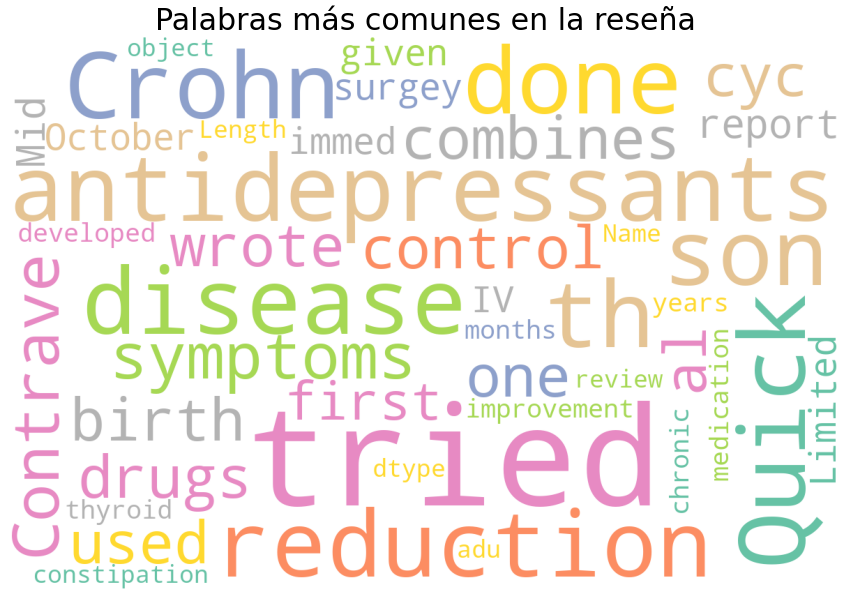

In [ ]:
wordcloud = WordCloud(background_color = 'white', colormap='Set2', stopwords = stop, width = 1200, height = 800).generate(str(df['review']))

plt.rcParams['figure.figsize'] = (15, 15)
plt.title('Palabras más comunes en la reseña', fontsize = 30)
print(wordcloud)
plt.axis('off')
plt.imshow(wordcloud)
plt.show()

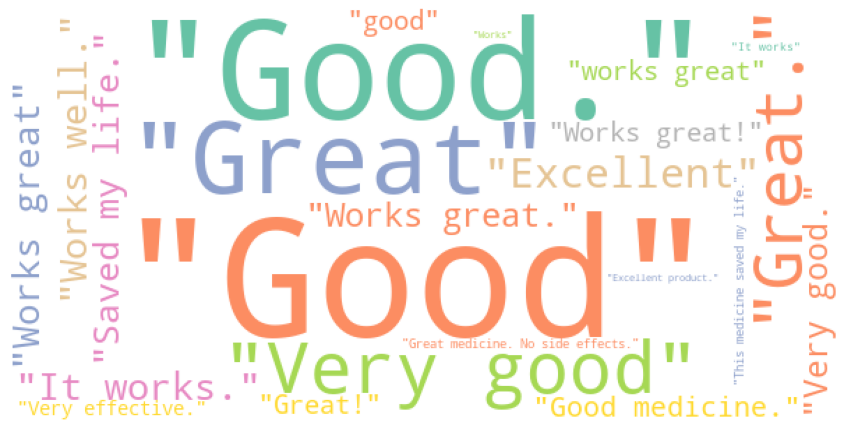

In [ ]:
#reseñas más utilizadas
data = df['review'].value_counts().to_dict()
wc = WordCloud(background_color = 'white', colormap='Set2', width = 600, height = 300).generate_from_frequencies(data)

plt.imshow(wc)
plt.axis('off')
plt.show()

In [ ]:
#se muestra la cantidad de caracteres que tiene cada reseña
df['cant_car']=df['review'].apply(len)

In [ ]:
df.head()

,drugName,review,rating,cant_car
0,Mirtazapine,"""I&#039;ve tried a few antidepressants over th...",10,439
1,Mesalamine,"""My son has Crohn&#039;s disease and has done ...",8,268
2,Bactrim,"""Quick reduction of symptoms""",9,29
3,Contrave,"""Contrave combines drugs that were used for al...",9,782
4,Cyclafem 1 / 35,"""I have been on this birth control for one cyc...",9,762


In [ ]:
#descripción de la columna agregada 
df['cant_car'].describe()

count    215063.000000
mean        458.620748
std         240.995226
min           3.000000
25%         262.000000
50%         456.000000
75%         690.000000
max       10787.000000
Name: cant_car, dtype: float64

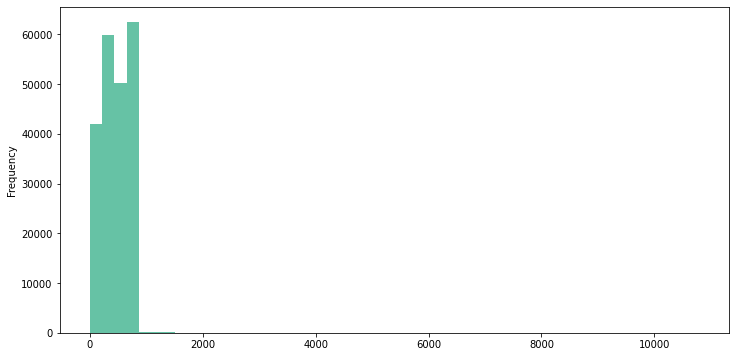

In [ ]:
df['cant_car'].plot(kind='hist', bins=50, figsize=(12,6), colormap='Set2')

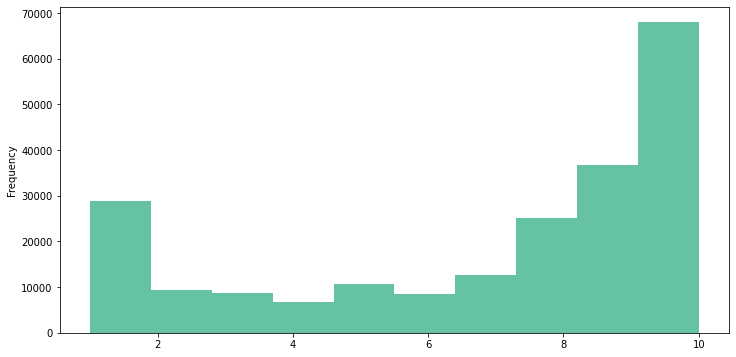

In [ ]:
df['rating'].plot(kind='hist', bins=10, figsize=(12,6), colormap='Set2')

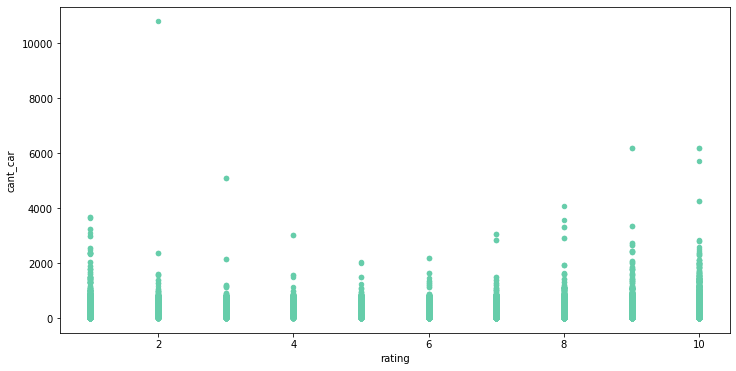

In [ ]:
#scatter plot entre calificación y longitud de reseña
df.plot(kind='scatter', x='rating', y='cant_car', figsize=(12,6), c='mediumaquamarine')

In [ ]:
nltk.downloader.download('vader_lexicon')

[nltk_data] Downloading package vader_lexicon to /root/nltk_data...


True

In [ ]:
from nltk.sentiment.vader import SentimentIntensityAnalyzer
Senti = SentimentIntensityAnalyzer()
sample_review = review_limpio[:5]
for sentence in sample_review:
    sentence
    ss = Senti.polarity_scores(sentence)
    for k in sorted(ss):
        print('{0}: {1}, '.format(k, ss[k]))
    print(sentence) 

compound: 0.4932, 
neg: 0.202, 
neu: 0.561, 
pos: 0.236, 
ive tried a few antidepressant over the year citalopram fluoxetine amitriptyline but none of those helped with my depression insomnia amp anxiety my doctor suggested and changed me onto mg mirtazapine and this medicine ha saved my life thankfully i have had no side effect especially the most common weight gain ive actually lost alot of weight i still have suicidal thought but mirtazapine ha saved me
compound: 0.855, 
neg: 0.111, 
neu: 0.621, 
pos: 0.268, 
my son ha crohn disease and ha done very well on the asacol he ha no complaint and show no side effect he ha taken a many a nine tablet per day at one time ive been very happy with the result reducing his bout of diarrhea drastically
compound: 0.0, 
neg: 0.0, 
neu: 1.0, 
pos: 0.0, 
quick reduction of symptom
compound: 0.4111, 
neg: 0.065, 
neu: 0.857, 
pos: 0.078, 
contrave combine drug that were used for alcohol smoking and opioid cessation people lose weight on it because it 

## Paso 4: Preparación del dataset

In [ ]:
my_file = open("texto_limpio.txt", "r")
review_limpio = my_file. readlines()

In [ ]:
textos = []
for sentence in review_limpio:
  phrase =[]
  for word in sentence.split():
    phrase.append(word)
  textos.append(phrase)

### Vectorización de palabras con Red Neuronal

In [ ]:
# Entrenar vectores de palabras
from gensim.test.utils import common_texts
from gensim.models import Word2Vec
import multiprocessing

model = Word2Vec(sentences=textos,
                 min_count=15, # ignora palabras que aparezcan menos de 15 veces
                 size=300, # dimension de la red
                 negative=20,
                 workers=4) # hacer cosas en paralelo para que sea rapido

model.save("word2vec.model")

## Paso 5: Implementación de modelos

### K-means

In [ ]:
word_vectors = Word2Vec.load("word2vec.model").wv

In [ ]:
list(word_vectors.wv.vocab)[:15]

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: DeprecationWarning: Call to deprecated `wv` (Attribute will be removed in 4.0.0, use self instead).
  """Entry point for launching an IPython kernel.


['ive',
 'tried',
 'a',
 'few',
 'antidepressant',
 'over',
 'the',
 'year',
 'citalopram',
 'fluoxetine',
 'amitriptyline',
 'but',
 'none',
 'of',
 'those']

In [ ]:
from sklearn.cluster import KMeans

#K-means con dos clusters (positivo/negativo), y 50 intentos de encontrar los mejores 
model = KMeans(n_clusters=3, max_iter=1000, random_state=1, n_init=50).fit(X=word_vectors.vectors.astype('double'))


In [ ]:
word_vectors.similar_by_vector(model.cluster_centers_[2], topn=10, restrict_vocab=None)

[('bubble', 0.5941229462623596),
 ('raw', 0.5885733366012573),
 ('noise', 0.5747756958007812),
 ('warm', 0.5730998516082764),
 ('tingly', 0.5713129639625549),
 ('tight', 0.5703285932540894),
 ('clammy', 0.5565146207809448),
 ('shaky', 0.5508956909179688),
 ('wet', 0.5423134565353394),
 ('stinging', 0.536319375038147)]

In [ ]:
words = pd.DataFrame(word_vectors.vocab.keys())
words.columns = ['words']
words['vectors'] = words.words.apply(lambda x: word_vectors.wv[f'{x}'])
words['cluster'] = words.vectors.apply(lambda x: model.predict([np.array(x)]))
words.cluster = words.cluster.apply(lambda x: x[0])
words['cluster_value'] = [1 if i==0 else -1 for i in words.cluster]
words['closeness_score'] = words.apply(lambda x: 1/(model.transform([x.vectors]).min()), axis=1)
words['sentiment_coeff'] = words.closeness_score * words.cluster_value

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:3: DeprecationWarning: Call to deprecated `wv` (Attribute will be removed in 4.0.0, use self instead).
  This is separate from the ipykernel package so we can avoid doing imports until


In [ ]:
words.head()

,words,vectors,cluster,cluster_value,closeness_score,sentiment_coeff
0,ive,"[-1.7557073, 0.13592249, 1.0211365, 0.9846345,...",0,1,0.035944,0.035944
1,tried,"[0.8323336, -0.4751337, -0.47556177, 0.4199509...",1,-1,0.036166,-0.036166
2,a,"[1.0146662, -1.4615676, -0.7395172, 0.47416225...",1,-1,0.050248,-0.050248
3,few,"[0.55512124, 0.5833659, -1.1171345, -1.3289868...",0,1,0.041698,0.041698
4,antidepressant,"[1.5586714, 2.2427242, -0.0027642082, 0.297473...",0,1,0.044715,0.044715


In [ ]:
words[['words', 'sentiment_coeff']].to_csv('sentiment_dictionary.csv', index=False)

### Visualización

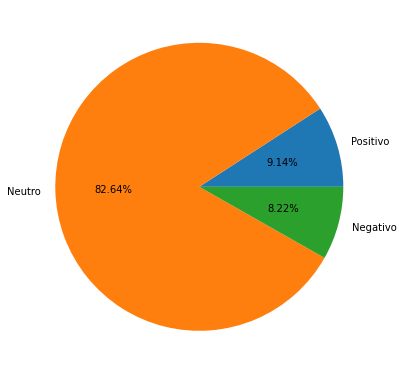

In [97]:
fig = plt.figure(figsize = (5,5))
ax = fig.add_axes([0,0,1,1])
ax.axis('equal')
langs = ['Positivo', 'Neutro', 'Negativo']
students = [(words[words.cluster == 0].cluster.count()/words.shape[0])*100, 
         (words[words.cluster == 1].cluster.count()/words.shape[0])*100,
         (words[words.cluster == 2].cluster.count()/words.shape[0])*100]
ax.pie(students, labels = langs,autopct='%1.2f%%')
plt.show()

In [100]:
8.22+.92

9.14

In [ ]:
pos=[0]
v0 = words[words['cluster'].isin(pos)]

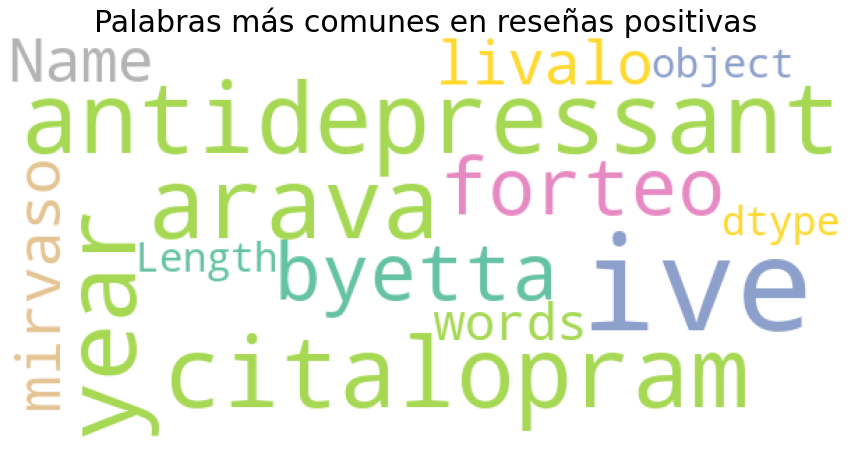

In [ ]:
wordcloud = WordCloud(background_color = 'white', colormap='Set2', stopwords = stop, width = 600, height = 300).generate(str(v0['words']))

plt.rcParams['figure.figsize'] = (15, 15)
plt.title('Palabras más comunes en reseñas positivas', fontsize = 30)
print(wordcloud)
plt.axis('off')
plt.imshow(wordcloud)
plt.show()

In [ ]:
neutro=[1]
v1 = words[words['cluster'].isin(neutro)]

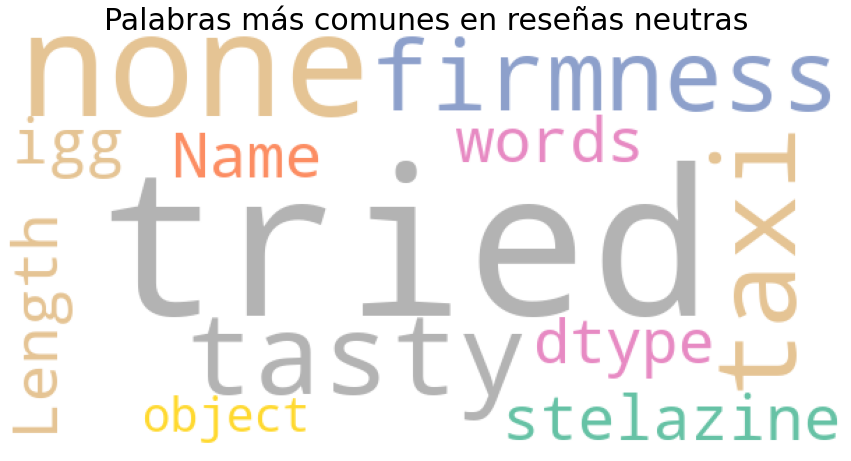

In [ ]:
wordcloud = WordCloud(background_color = 'white', colormap='Set2', stopwords = stop, width = 600, height = 300).generate(str(v1['words']))

plt.rcParams['figure.figsize'] = (15, 15)
plt.title('Palabras más comunes en reseñas neutras', fontsize = 30)
print(wordcloud)
plt.axis('off')
plt.imshow(wordcloud)
plt.show()

In [ ]:
neg=[2]
v2=words[words['cluster'].isin(neg)]

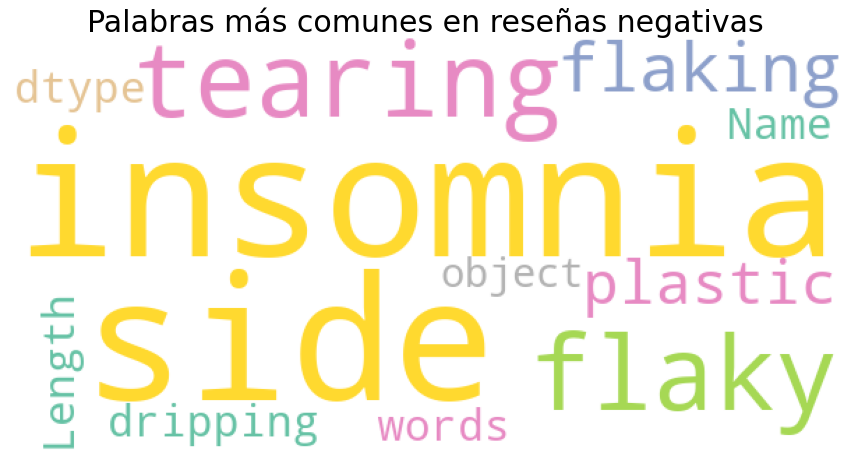

In [ ]:
wordcloud = WordCloud(background_color = 'white', colormap='Set2', stopwords = stop, width = 600, height = 300).generate(str(v2['words']))

plt.rcParams['figure.figsize'] = (15, 15)
plt.title('Palabras más comunes en reseñas negativas', fontsize = 30)
print(wordcloud)
plt.axis('off')
plt.imshow(wordcloud)
plt.show()

## Evaluación

In [ ]:
import numpy as np
import pandas as pd
from IPython.display import display
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.metrics import accuracy_score, confusion_matrix, precision_score, recall_score, f1_score

In [ ]:
sentiment_map = pd.read_csv('sentiment_dictionary.csv')
sentiment_dict = dict(zip(sentiment_map.words.values, sentiment_map.sentiment_coeff.values))

In [ ]:
sentiment_dict

{'ive': 0.0359442506644421,
 'tried': -0.0361661138494348,
 'a': -0.0502484824246927,
 'few': 0.0416975558086482,
 'antidepressant': 0.0447154003898504,
 'over': -0.0420547623610175,
 'the': -0.0538389160051361,
 'year': 0.0339779045376281,
 'citalopram': 0.085536335992275,
 'fluoxetine': 0.1138562017291058,
 'amitriptyline': 0.095692276585899,
 'but': -0.0570498968343783,
 'none': -0.0456309809659579,
 'of': -0.0429843095414641,
 'those': -0.0516302917720379,
 'helped': -0.0348919445796763,
 'with': -0.0433571703453046,
 'my': -0.0431620215433543,
 'depression': 0.0408781521648529,
 'insomnia': -0.0544007061389559,
 'amp': -0.0626330313026722,
 'anxiety': 0.037241767767609,
 'doctor': 0.0329193536039597,
 'suggested': -0.0372165925851696,
 'and': -0.0720273977143723,
 'changed': -0.0371072522609198,
 'me': 0.0379148258044429,
 'onto': -0.078597814932234,
 'mg': 0.0365880643946457,
 'mirtazapine': 0.1044066657538659,
 'this': -0.0420835528643752,
 'medicine': 0.04427016179211,
 'ha': -

In [ ]:
review = pd.Series(review_limpio, name='review')
rating = pd.Series(df['rating'], name='rating')
final_file = pd.concat([review, rating], axis=1)

In [ ]:
file_weighting = final_file.copy()

In [ ]:
tfidf = TfidfVectorizer(tokenizer=lambda y: y.split(), norm=None)
tfidf.fit(file_weighting['review'])
features = pd.Series(tfidf.get_feature_names())
transformed = tfidf.transform(file_weighting['review'])

/usr/local/lib/python3.7/dist-packages/sklearn/feature_extraction/text.py:517: UserWarning: The parameter 'token_pattern' will not be used since 'tokenizer' is not None'
  "The parameter 'token_pattern' will not be used"
/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


In [ ]:
def create_tfidf_dictionary(x, transformed_file, features):
    '''
    create dictionary for each input sentence x, where each word has assigned its tfidf score
    
    inspired  by function from this wonderful article: 
    https://medium.com/analytics-vidhya/automated-keyword-extraction-from-articles-using-nlp-bfd864f41b34
    
    x - row of dataframe, containing sentences, and their indexes,
    transformed_file - all sentences transformed with TfidfVectorizer
    features - names of all words in corpus used in TfidfVectorizer

    '''
    vector_coo = transformed_file[x.name].tocoo()
    vector_coo.col = features.iloc[vector_coo.col].values
    dict_from_coo = dict(zip(vector_coo.col, vector_coo.data))
    return dict_from_coo

def replace_tfidf_words(x, transformed_file, features):
    '''
    replacing each word with it's calculated tfidf dictionary with scores of each word
    x - row of dataframe, containing sentences, and their indexes,
    transformed_file - all sentences transformed with TfidfVectorizer
    features - names of all words in corpus used in TfidfVectorizer
    '''
    dictionary = create_tfidf_dictionary(x, transformed_file, features)   
    return list(map(lambda y:dictionary[f'{y}'], x.review.split()))

In [ ]:
%%time
replaced_tfidf_scores = file_weighting.apply(lambda x: replace_tfidf_words(x, transformed, features), axis=1)#this step takes around 3-4 minutes minutes to calculate

CPU times: user 1min 16s, sys: 2.09 s, total: 1min 18s
Wall time: 1min 16s


In [ ]:
def replace_sentiment_words(word, sentiment_dict):
    '''
    replacing each word with its associated sentiment score from sentiment dict
    '''
    try:
        out = sentiment_dict[word]
    except KeyError:
        out = 0
    return out

In [ ]:
replaced_closeness_scores = file_weighting.review.apply(lambda x: list(map(lambda y: replace_sentiment_words(y, sentiment_dict), x.split())))

In [ ]:
replacement_df = pd.DataFrame(data=[replaced_closeness_scores, replaced_tfidf_scores, file_weighting.review, file_weighting.rating]).T
replacement_df.columns = ['sentiment_coeff', 'tfidf_scores', 'sentence', 'sentiment']
replacement_df['sentiment_rate'] = replacement_df.apply(lambda x: np.array(x.loc['sentiment_coeff']) @ np.array(x.loc['tfidf_scores']), axis=1)
replacement_df['prediction'] = (replacement_df.sentiment_rate>0).astype('int8')
replacement_df['sentiment'] = [1 if i==1 else 0 for i in replacement_df.sentiment]

In [ ]:
predicted_classes = replacement_df.prediction
y_test = replacement_df.sentiment

conf_matrix = pd.DataFrame(confusion_matrix(replacement_df.sentiment, replacement_df.prediction))
print('Confusion Matrix')
display(conf_matrix)

test_scores = accuracy_score(y_test,predicted_classes), precision_score(y_test, predicted_classes), recall_score(y_test, predicted_classes), f1_score(y_test, predicted_classes)

print('\n \n Scores')
scores = pd.DataFrame(data=[test_scores])
scores.columns = ['accuracy', 'precision', 'recall', 'f1']
scores = scores.T
scores.columns = ['scores']
display(scores)


Confusion Matrix


,0,1
0,180336,5809
1,28196,722



 
 Scores


,scores
accuracy,0.841884
precision,0.110550
recall,0.024967
f1,0.040735
